In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# variant 27
# f(x) = cosh( x ) / ( x**5 + x**4 + x**3 + x**2 + x + 1 )
# [0, 10]

In [27]:
# parameters that can be changed

n = 5             # number of points for interpolation
is_even = False    # type of fragmentation

In [28]:
# function declaration

a = 0
b = 10
h = 0

x = symbols('x')
f_x = cosh(x) / ( x**5 + x**4 + x**3 + x**2 + x + 1 )
f_x

cosh(x)/(x**5 + x**4 + x**3 + x**2 + x + 1)

In [29]:
# defenition of fragmentation

coords = []
if is_even:
    h = (b - a) / (n - 1)
    print("h: ", h)
    for i in range(n):
        coords.append(a + i * h)
else:
    for i in range(n):
        coords.append(((b + a) / 2 + (b - a) / 2 * cos(pi * (2 * i + 1) / 2 / n)).n())
coords

[9.75528258147577,
 7.93892626146237,
 5.00000000000000,
 2.06107373853763,
 0.244717418524232]

In [30]:
# values of function in defined points

values = []
for i in range(len(coords)):
    values.append(f_x.subs(x, coords[i]).n())
values

[0.0875925051156058,
 0.0388620159191396,
 0.0189989627559621,
 0.0559697341909770,
 0.778178465605203]

In [31]:
# making interpolation

F_x = 0
for i in range(len(values)):
    curr = values[i]
    for k in range(len(values)):
        if k != i:
            curr *= (x - coords[k]) / (coords[i] - coords[k])
    F_x += curr
F_x

(0.0389756543935659 - 0.00399533832752078*x)*(2.70130161670408 - 0.340260323340816*x)*(0.210292444847653*x - 0.0514622242382672)*(0.340260323340816*x - 0.70130161670408) + (0.0709625361344584 - 0.0072742676126275*x)*(1.35065080835204 - 0.170130161670408*x)*(1.70130161670408 - 0.340260323340816*x)*(0.550552768188469*x - 0.134729852192452) + (0.20872003075598 - 0.0213955904416667*x)*(0.129967878493163*x - 0.0318054037159178)*(0.170130161670408*x - 0.35065080835204)*(0.340260323340816*x - 1.70130161670408) + (0.798201862952385 - 0.0818225260299568*x)*(1.03180540371592 - 0.129967878493163*x)*(1.05146222423827 - 0.210292444847653*x)*(1.13472985219245 - 0.550552768188469*x) + (0.0482242961639594*x - 0.382849131256596)*(0.105146222423827*x - 0.0257311121191336)*(0.129967878493163*x - 0.267873381215708)*(0.210292444847653*x - 1.05146222423827)

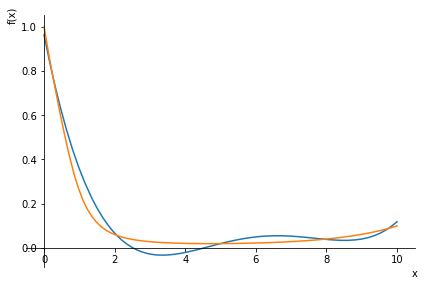

In [32]:
# plotting

# blue - F_x
# orange - f_x

plot(F_x, f_x, (x, 0, 10))

In [33]:
# checking
# coords - midpoints of segments

check_coords = []
for i in range(len(coords) - 1):
    check_coords.append((coords[i + 1] + coords[i]) / 2)
#check_coords

check_values = []
for i in range(len(check_coords)):
    check_values.append(f_x.subs(x, check_coords[i]).n())
#check_values

current_values = []     # values of interpolated function
for i in range(len(check_coords)):
    current_values.append(F_x.subs(x, check_coords[i]).n())
#current_values

squares = []
for i in range(len(check_coords)):
    squares.append((check_values[i] - current_values[i]) * (check_values[i] - current_values[i]))
max(squares)

0.00953087994033540

In [19]:
# the same algorithm in one function

def count_diff(current_n, current_is_even):
    x = symbols('x')
    f_x = cosh(x) / ( x**5 + x**4 + x**3 + x**2 + x + 1 )
    a = 0
    b = 10
    h = 0
    coords = []
    if current_is_even:
        h = (b - a) / (current_n - 1)
        for i in range(current_n):
            coords.append(a + i * h)
    else:
        for i in range(current_n):
            coords.append(((b + a) / 2 + (b - a) / 2 * cos(pi * (2 * i + 1) / 2 / current_n)).n())
    values = []
    for i in range(len(coords)):
        values.append(f_x.subs(x, coords[i]).n())
    F_x = 0
    for i in range(len(values)):
        curr = values[i]
        for k in range(len(values)):
            if k != i:
                curr *= (x - coords[k]) / (coords[i] - coords[k])
        F_x += curr
    check_coords = []
    for i in range(len(coords) - 1):
        check_coords.append((coords[i + 1] + coords[i]) / 2)
    check_values = []
    for i in range(len(check_coords)):
        check_values.append(f_x.subs(x, check_coords[i]).n())
    current_values = []
    for i in range(len(check_coords)):
        current_values.append(F_x.subs(x, check_coords[i]).n())
    abses = []
    for i in range(len(check_coords)):
        abses.append(np.absolute(check_values[i] - current_values[i]))
    return [max(abses), (x, a, b), F_x, f_x]

In [39]:
result = count_diff(100, True)
print(result[0])
plot(result[2], result[3], result[1])

90328954270.7554
